In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'piemonte'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2021-02-17T17:00:00,1,Piemonte,1875,138,2013,10154,12167,-59,959,...,22.0,22151.0,7316.0,-31.0,6.86,16.54,4.33,13.11,-2.13,-0.48
359,2021-02-18T17:00:00,1,Piemonte,1866,128,1994,10012,12006,-161,501,...,16.0,14438.0,3561.0,-142.0,6.42,16.61,3.47,14.07,-7.25,-1.32
360,2021-02-19T17:00:00,1,Piemonte,1849,130,1979,10458,12437,431,1307,...,25.0,27569.0,7585.0,446.0,6.57,15.91,4.74,17.23,1.56,3.59
361,2021-02-20T17:00:00,1,Piemonte,1857,130,1987,10621,12608,171,765,...,12.0,20595.0,5692.0,163.0,6.54,15.76,3.71,13.44,0.00,1.37


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 802
Nuovi tamponi: 11988.0
Percentuale nuovi positivi/nuovi tamponi: 6.7 %
Nuovi guariti: 582.0
Nuovi deceduti: 8.0
Variazione positivi ricoverati con sintomi: 11.0
Variazione positivi in terapia intensiva: 8.0
Variazione positivi in isolamento dimiciliare: 193.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-23T17:00:00,1,Piemonte,3239,215,3454,33107,36561,-348,933,...,58.0,8946.0,3094.0,-243.0,6.22,9.45,10.43,30.16,-5.70,-0.94
1,2020-12-24T17:00:00,1,Piemonte,3144,213,3357,31513,34870,-1691,1057,...,48.0,9046.0,3519.0,-1594.0,6.34,9.63,11.68,30.04,-0.93,-4.63
2,2020-12-25T17:00:00,1,Piemonte,3029,214,3243,28254,31497,-3373,875,...,28.0,6080.0,2223.0,-3259.0,6.60,10.30,14.39,39.36,0.47,-9.67
3,2020-12-26T17:00:00,1,Piemonte,3011,208,3219,28338,31557,60,417,...,12.0,2704.0,1206.0,84.0,6.46,10.20,15.42,34.58,-2.80,0.19
4,2020-12-27T17:00:00,1,Piemonte,3039,211,3250,27812,31062,-495,470,...,17.0,3302.0,1583.0,-526.0,6.49,10.46,14.23,29.69,1.44,-1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-17T17:00:00,1,Piemonte,1875,138,2013,10154,12167,-59,959,...,22.0,22151.0,7316.0,-31.0,6.86,16.54,4.33,13.11,-2.13,-0.48
57,2021-02-18T17:00:00,1,Piemonte,1866,128,1994,10012,12006,-161,501,...,16.0,14438.0,3561.0,-142.0,6.42,16.61,3.47,14.07,-7.25,-1.32
58,2021-02-19T17:00:00,1,Piemonte,1849,130,1979,10458,12437,431,1307,...,25.0,27569.0,7585.0,446.0,6.57,15.91,4.74,17.23,1.56,3.59
59,2021-02-20T17:00:00,1,Piemonte,1857,130,1987,10621,12608,171,765,...,12.0,20595.0,5692.0,163.0,6.54,15.76,3.71,13.44,0.00,1.37


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

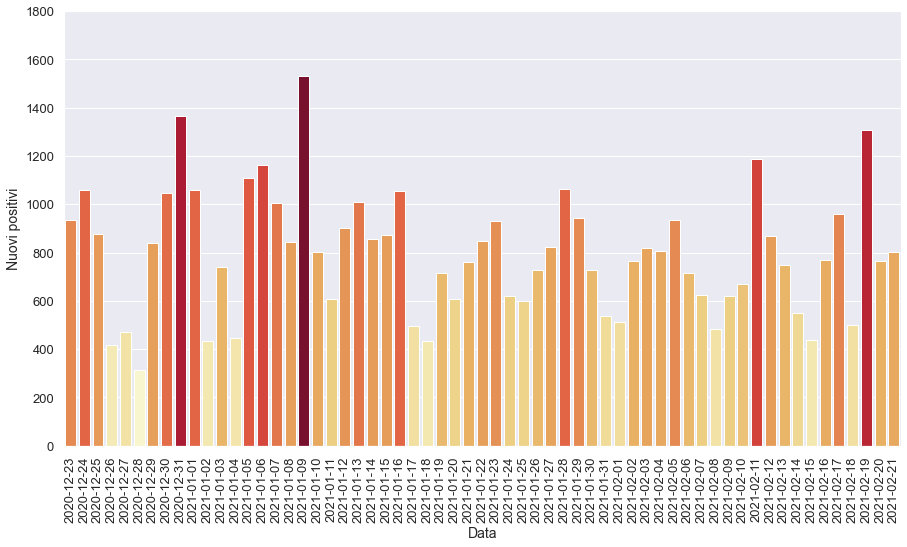

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

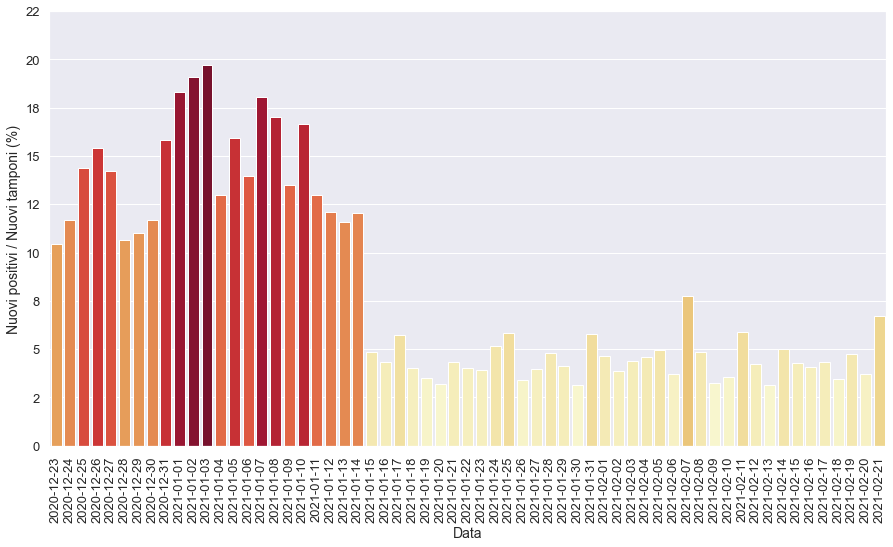

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

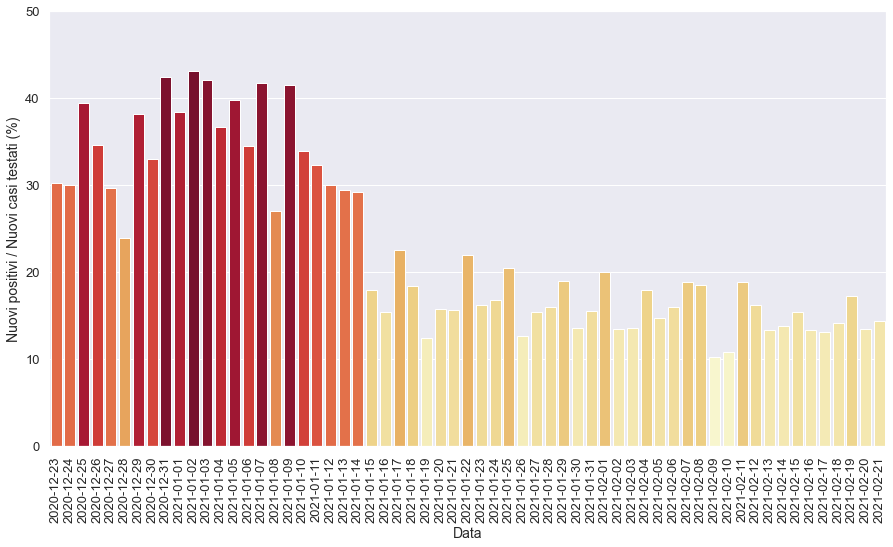

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

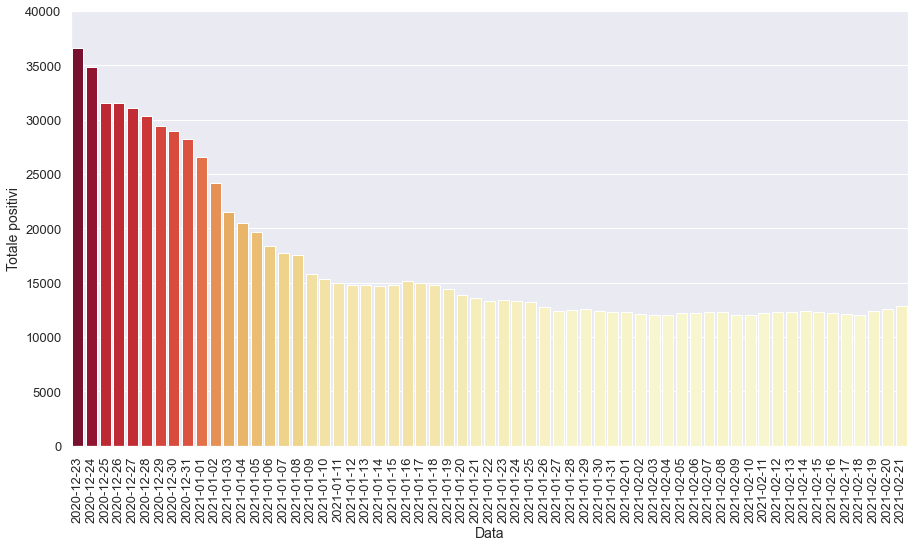

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

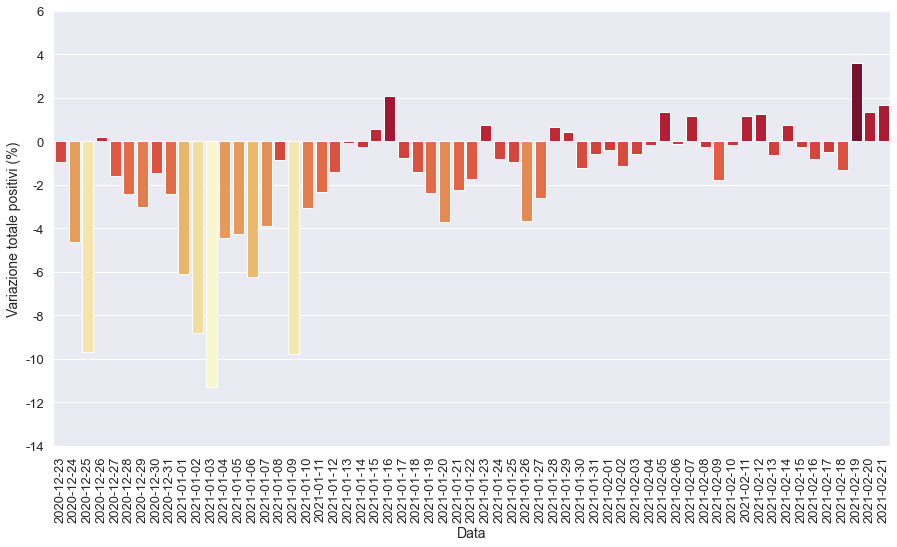

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

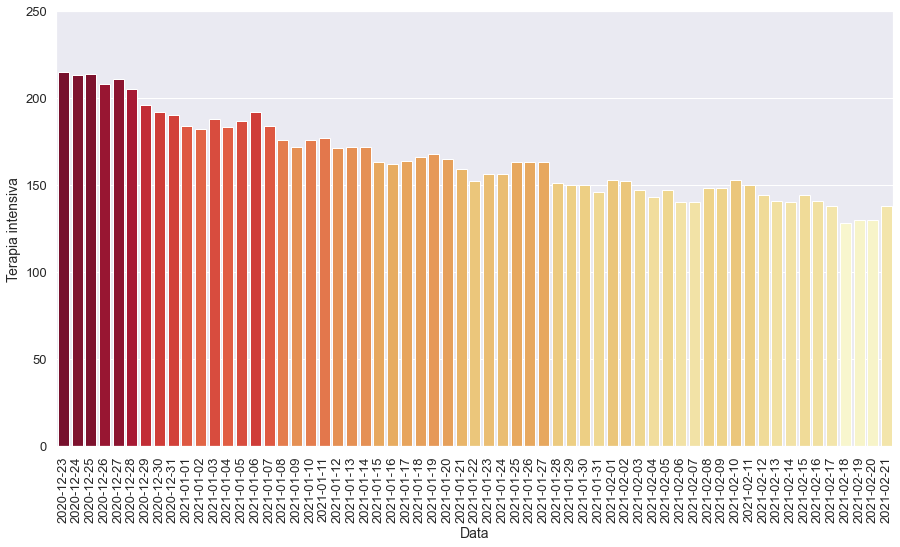

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

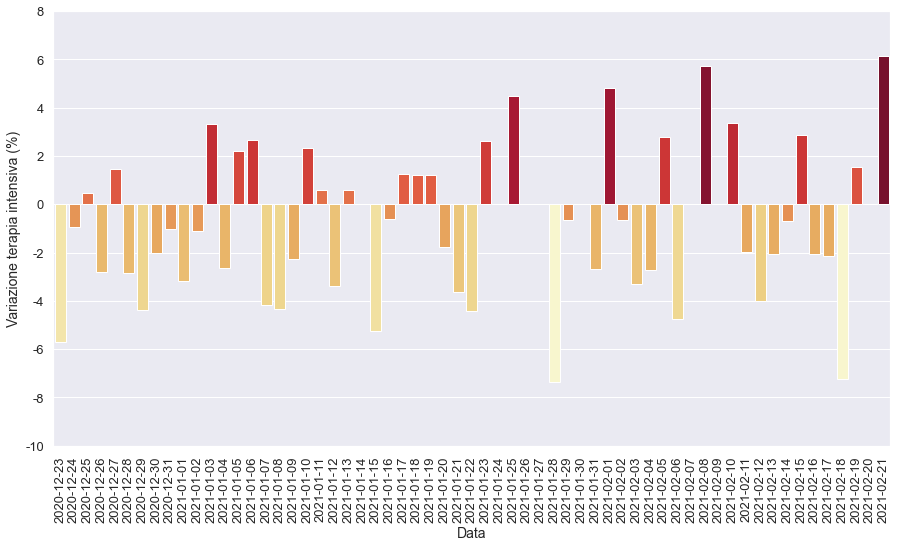

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

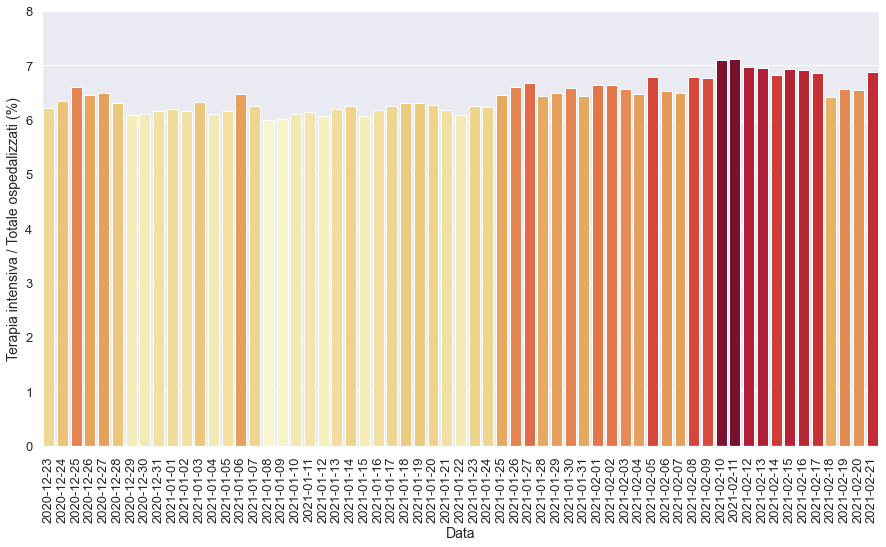

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

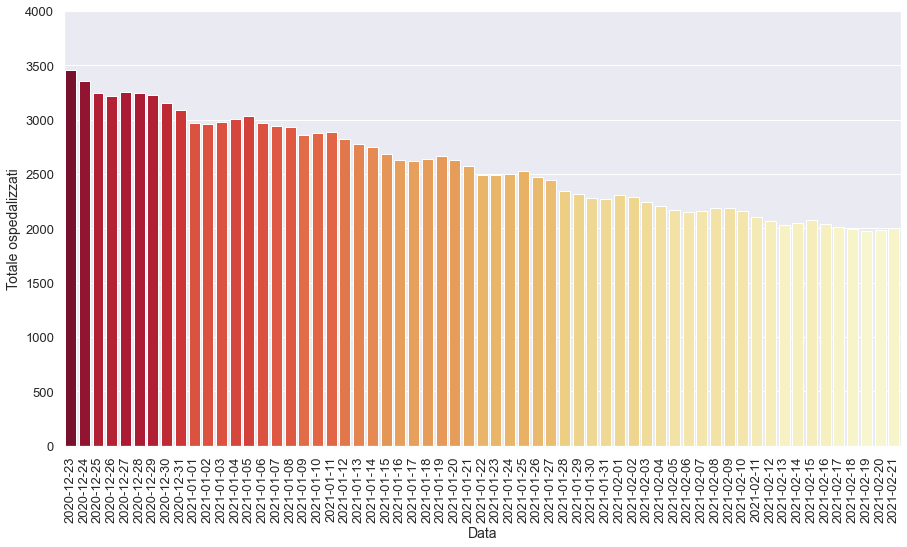

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

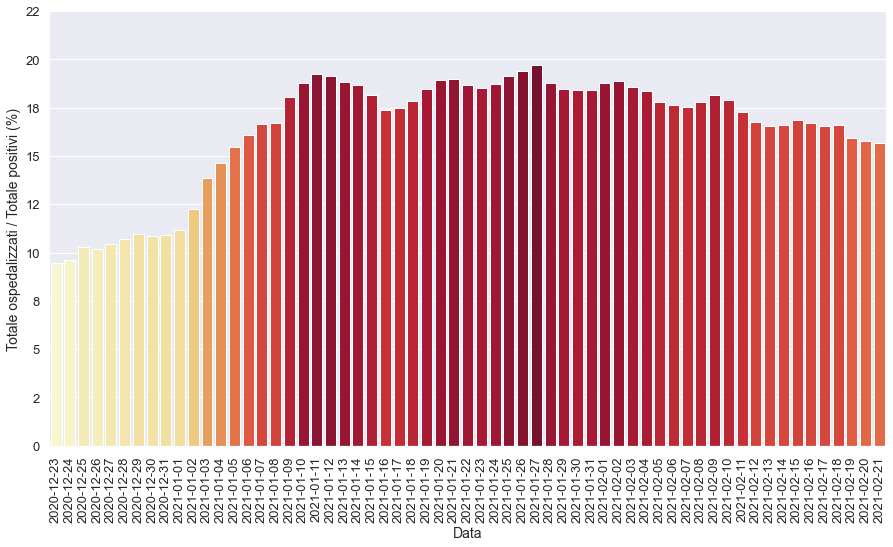

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

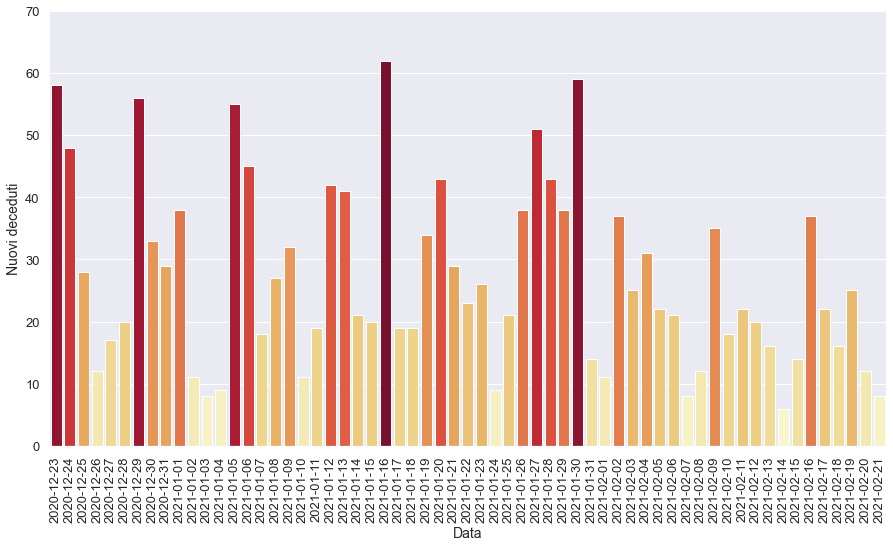

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

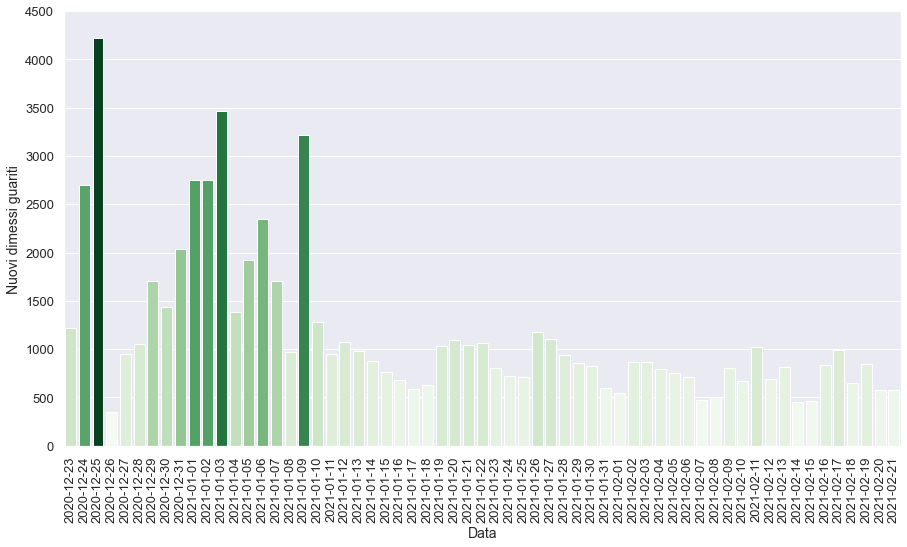

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-22T17:00:00,1,Piemonte,2342,152,2494,10862,13356,-237,849,...,23.0,21060.0,3870.0,-153.0,6.09,18.67,4.03,21.94,-4.40,-1.74
1,2021-01-23T17:00:00,1,Piemonte,2337,156,2493,10962,13455,99,931,...,26.0,23769.0,5736.0,100.0,6.26,18.53,3.92,16.23,2.63,0.74
2,2021-01-24T17:00:00,1,Piemonte,2345,156,2501,10845,13346,-109,619,...,9.0,12023.0,3696.0,-117.0,6.24,18.74,5.15,16.75,0.00,-0.81
3,2021-01-25T17:00:00,1,Piemonte,2364,163,2527,10691,13218,-128,600,...,21.0,10313.0,2935.0,-154.0,6.45,19.12,5.82,20.44,4.49,-0.96
4,2021-01-26T17:00:00,1,Piemonte,2307,163,2470,10264,12734,-484,728,...,38.0,21364.0,5745.0,-427.0,6.60,19.40,3.41,12.67,0.00,-3.66
5,2021-01-27T17:00:00,1,Piemonte,2280,163,2443,9958,12401,-333,821,...,51.0,20654.0,5319.0,-306.0,6.67,19.70,3.98,15.44,0.00,-2.62
6,2021-01-28T17:00:00,1,Piemonte,2194,151,2345,10139,12484,83,1062,...,43.0,22175.0,6648.0,181.0,6.44,18.78,4.79,15.97,-7.36,0.67
7,2021-01-29T17:00:00,1,Piemonte,2163,150,2313,10224,12537,53,944,...,38.0,22841.0,4995.0,85.0,6.49,18.45,4.13,18.90,-0.66,0.42
8,2021-01-30T17:00:00,1,Piemonte,2127,150,2277,10105,12382,-155,727,...,59.0,23052.0,5374.0,-119.0,6.59,18.39,3.15,13.53,0.00,-1.24
9,2021-01-31T17:00:00,1,Piemonte,2122,146,2268,10044,12312,-70,538,...,14.0,9258.0,3462.0,-61.0,6.44,18.42,5.81,15.54,-2.67,-0.57


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

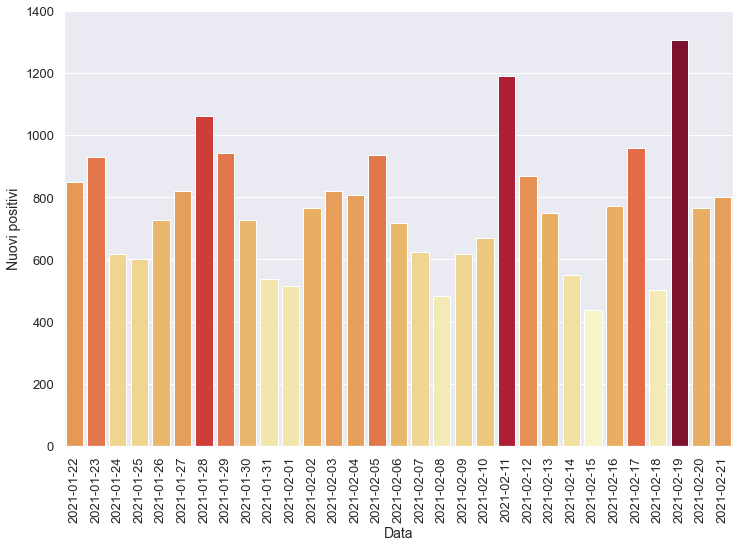

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

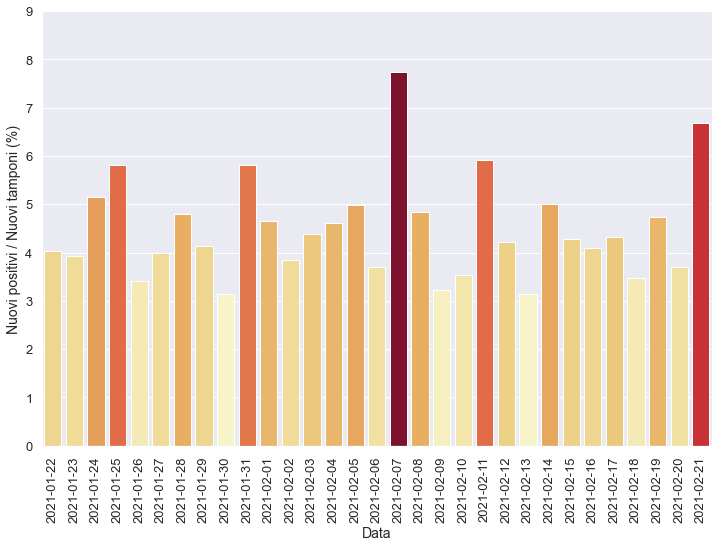

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

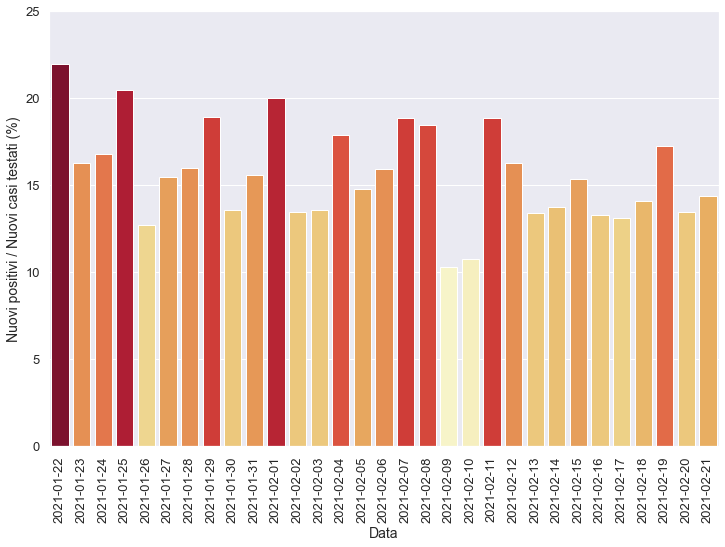

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

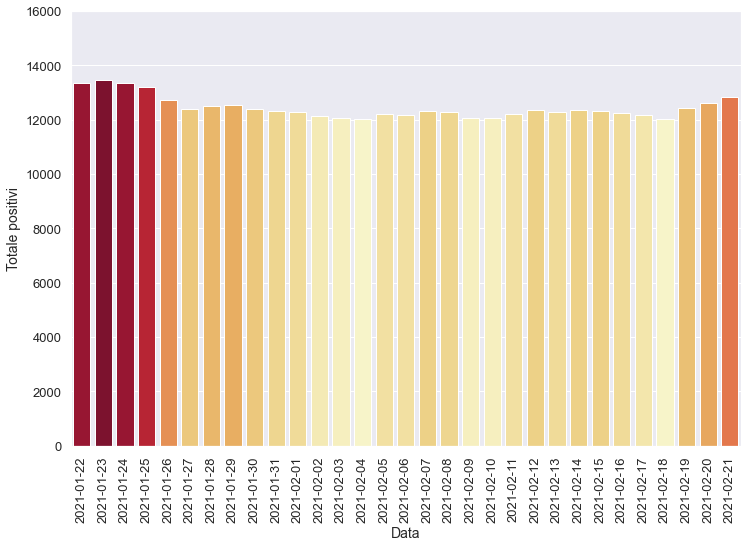

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

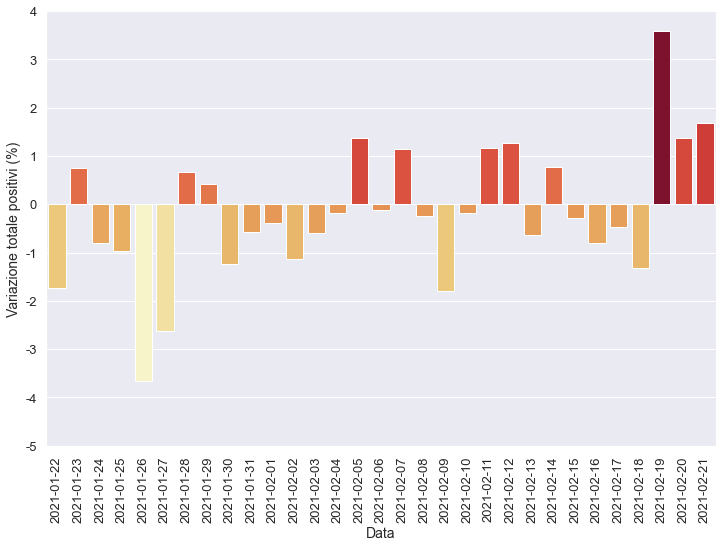

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

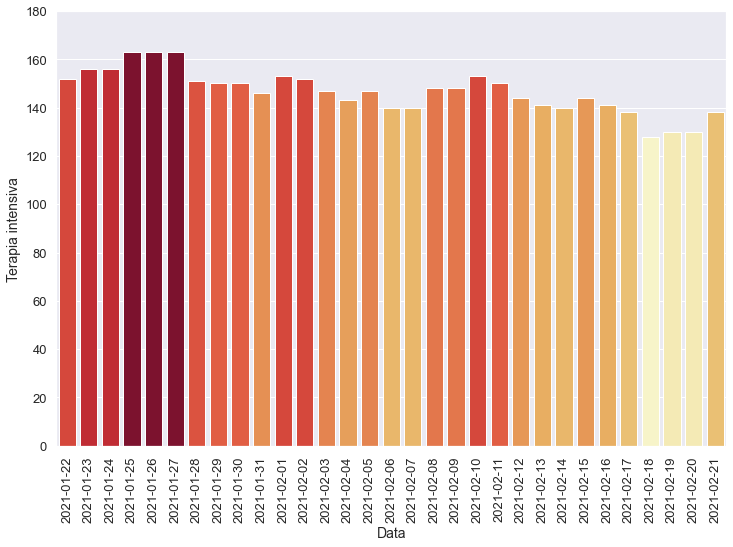

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

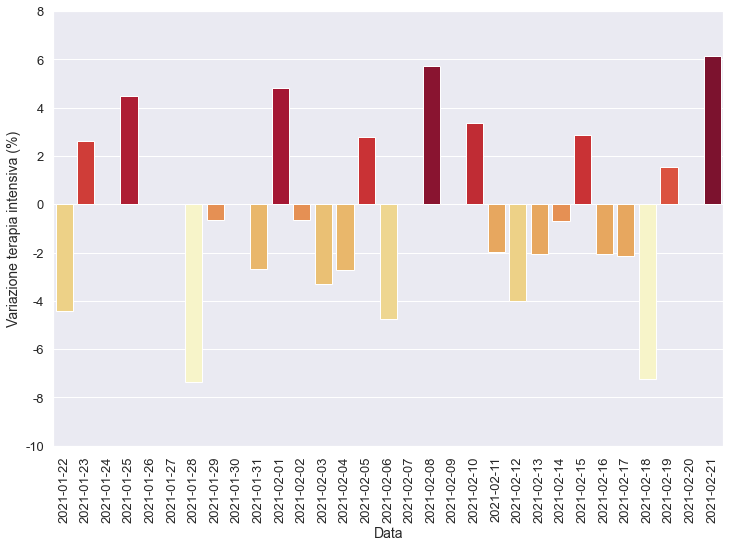

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

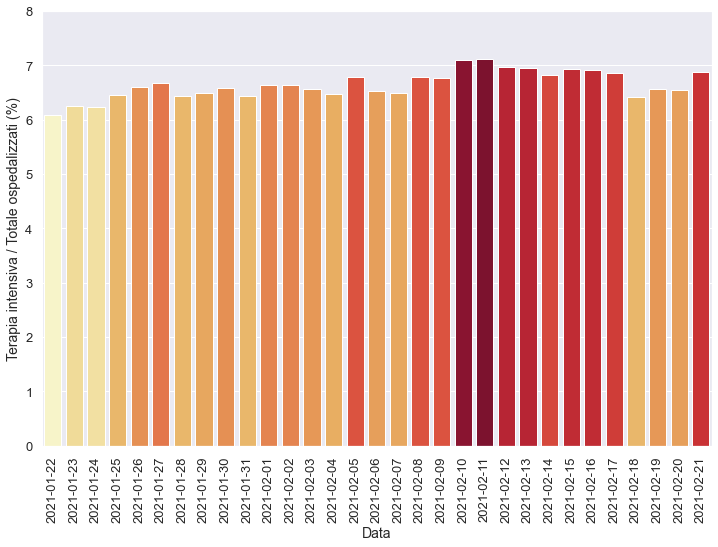

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

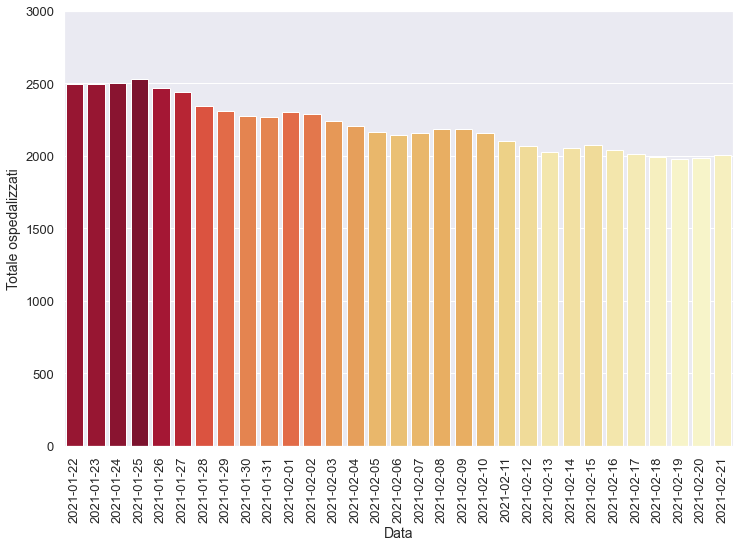

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

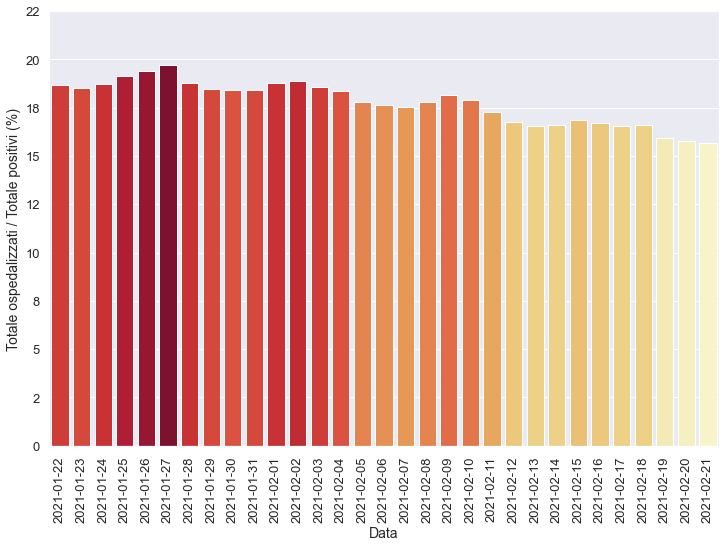

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

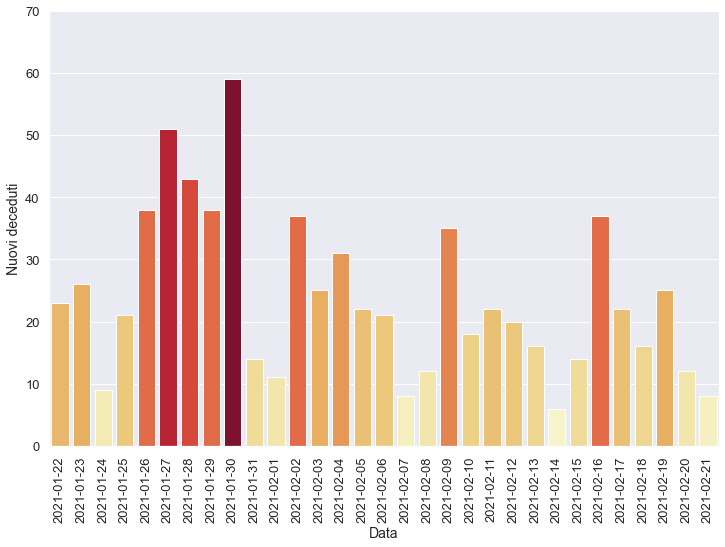

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

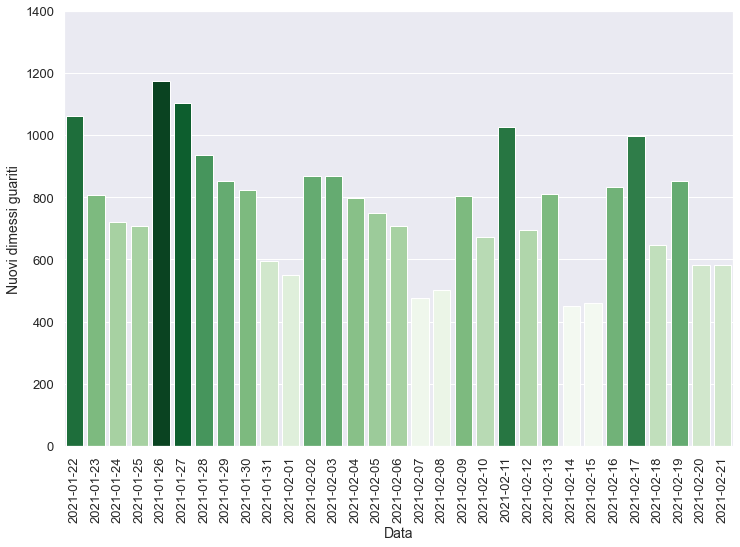

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,1,Piemonte,1913,140,2053,10308,12361,94,549,...,6.0,10990.0,4000.0,71.0,6.82,16.61,5.00,13.73,-0.71,0.77
1,2021-02-15T17:00:00,1,Piemonte,1933,144,2077,10249,12326,-35,438,...,14.0,10263.0,2851.0,-59.0,6.93,16.85,4.27,15.36,2.86,-0.28
2,2021-02-16T17:00:00,1,Piemonte,1900,141,2041,10185,12226,-100,771,...,37.0,18824.0,5806.0,-64.0,6.91,16.69,4.10,13.28,-2.08,-0.81
3,2021-02-17T17:00:00,1,Piemonte,1875,138,2013,10154,12167,-59,959,...,22.0,22151.0,7316.0,-31.0,6.86,16.54,4.33,13.11,-2.13,-0.48
4,2021-02-18T17:00:00,1,Piemonte,1866,128,1994,10012,12006,-161,501,...,16.0,14438.0,3561.0,-142.0,6.42,16.61,3.47,14.07,-7.25,-1.32
5,2021-02-19T17:00:00,1,Piemonte,1849,130,1979,10458,12437,431,1307,...,25.0,27569.0,7585.0,446.0,6.57,15.91,4.74,17.23,1.56,3.59
6,2021-02-20T17:00:00,1,Piemonte,1857,130,1987,10621,12608,171,765,...,12.0,20595.0,5692.0,163.0,6.54,15.76,3.71,13.44,0.00,1.37
7,2021-02-21T17:00:00,1,Piemonte,1868,138,2006,10814,12820,212,802,...,8.0,11988.0,5587.0,193.0,6.88,15.65,6.69,14.35,6.15,1.68


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

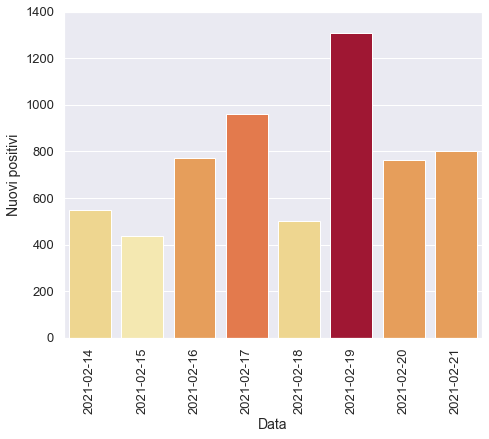

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

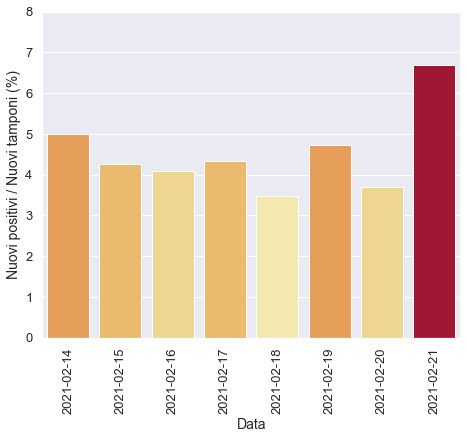

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

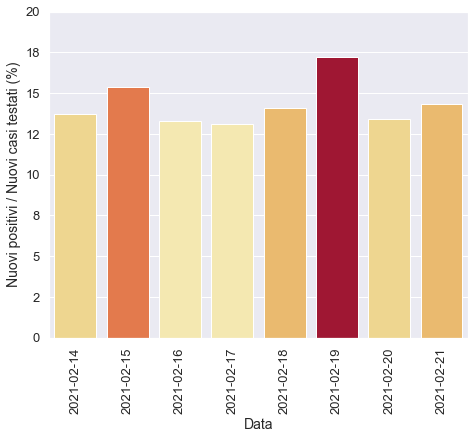

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

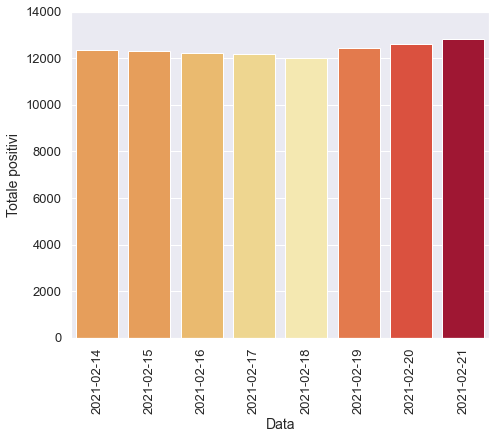

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

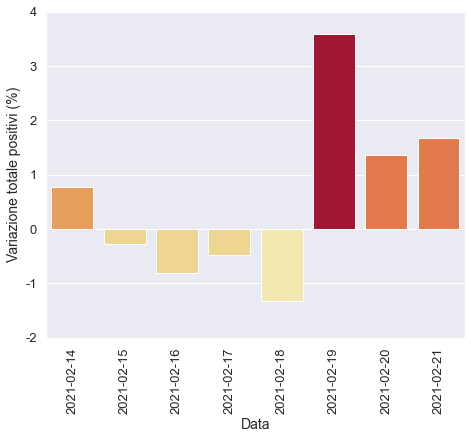

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

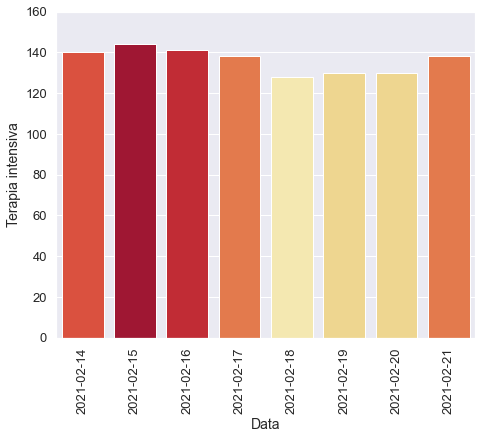

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

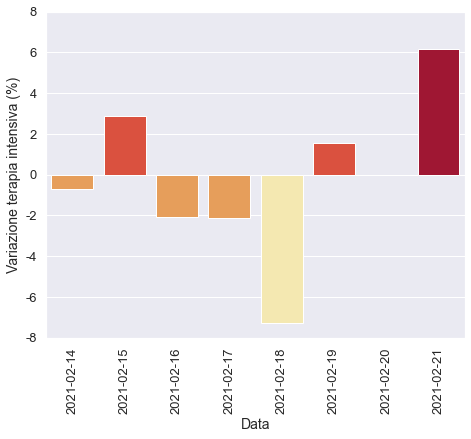

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

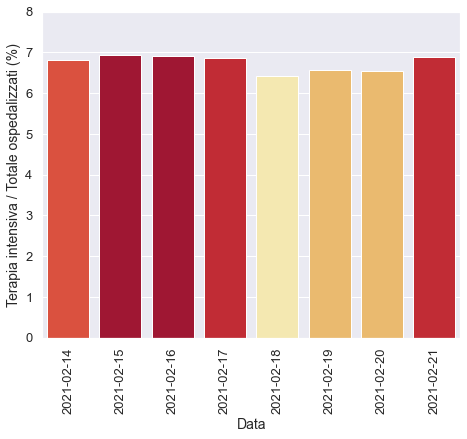

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

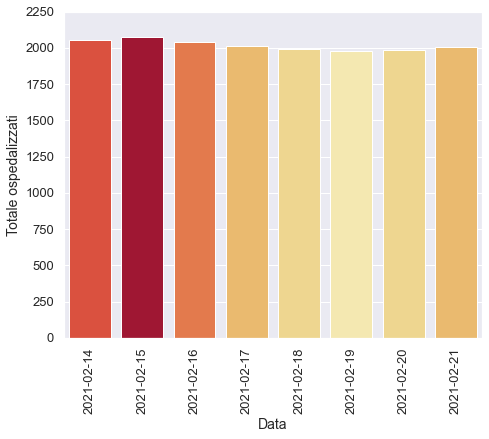

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

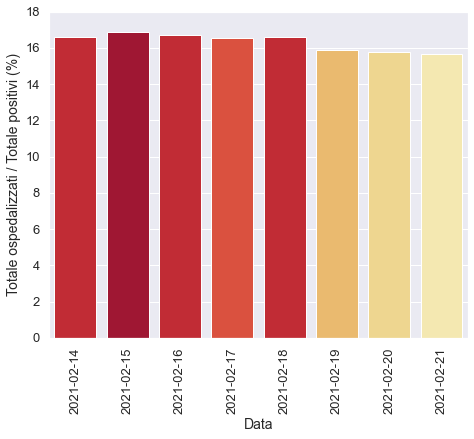

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

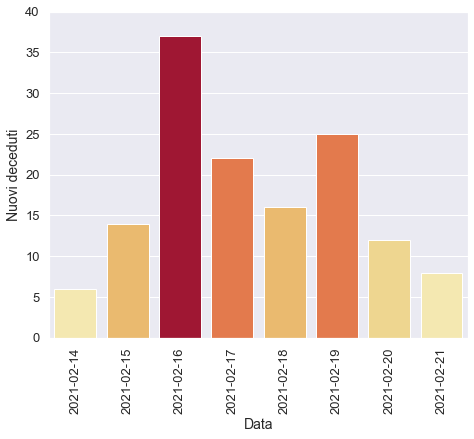

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

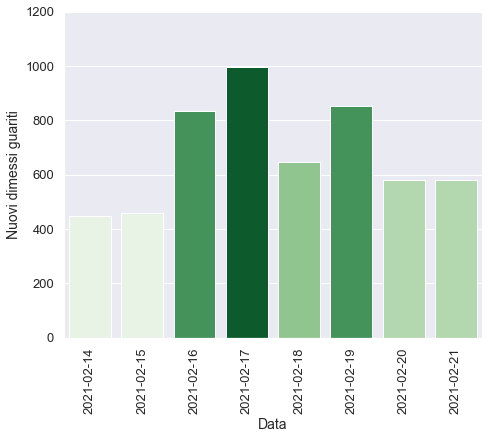

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)